In [1]:
import pandas as pd
import numpy as np
import glob

files = glob.glob("../../../sharedfiles/P Data/*.csv")
full_data = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    full_data = pd.concat([full_data, data])


C:\Users\Mao\AppData\Local\Temp\ipykernel_46032\504452542.py:8: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\Mao\AppData\Local\Temp\ipykernel_46032\504452542.py:8: DtypeWarning: Columns (45,50,51,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\Mao\AppData\Local\Temp\ipykernel_46032\504452542.py:8: DtypeWarning: Columns (47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\Mao\AppData\Local\Temp\ipykernel_46032\504452542.py:8: DtypeWarning: Columns (47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\Mao\AppData\Local\Temp\ipykernel_46032\504452542.py:8: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
C:\Users\Mao\AppData\Loca

In [3]:
import preprocessor as p

full_data["Message"] = full_data["Message"].apply(lambda x: p.clean(x))


In [4]:
full_data.drop_duplicates(subset="Message", keep="first", inplace=True)

In [9]:
trump = full_data[full_data.Message.str.contains("trump", case=False)]
print(trump.shape)


(30179, 106)


In [10]:
biden = full_data[full_data.Message.str.contains("biden", case=False)]
print(biden.shape)


(2496, 106)


In [11]:
covid = full_data[full_data.Message.str.contains("covid", case=False)]
print(covid.shape)


(17848, 106)


In [14]:
illegal = full_data[full_data.Message.str.contains("illegal", case=False)]
print(illegal.shape)


(17236, 106)


In [16]:
trump.columns

Index(['UniversalMessageId', 'SocialNetwork', 'SenderUserId',
       'SenderScreenName', 'SenderListedName', 'SenderProfileImgUrl',
       'SenderProfileLink', 'Sender Followers Count', 'SenderInfluencerScore',
       'SenderAge',
       ...
       'trustFedStats_query_distance', 'unauthorizedUse_query_distance',
       'message2_query_distance', 'documentation_query_distance',
       'message3_query_distance', 'usedAgainst_query_distance',
       'encourage_query_distance', 'shareData_query_distance',
       'answer1_query_distance', 'answer1_distance'],
      dtype='object', length=106)

In [17]:
trump = trump[["UniversalMessageId", "Message", "Day"]]
trump.to_csv("../data/trump.csv", index=False)


In [18]:
trump_sample = trump.sample(5000)
trump_sample.to_csv("../data/trump_sample.csv", index=False)


In [20]:
biden

,UniversalMessageId,Message,Day
677,TWITTER_8_1212585658914627584,Biden says that he became popular at the pool ...,2020-01-02
7580,TWITTER_8_1212942726305591296,The idea of a Biden nomination and the impossi...,2020-01-02
160,TWITTER_7_1213310447002230784,"is best chance at Texas in a generation, in a ...",2020-01-04
7471,TWITTER_4_1214196781262589952,"years ago VP Biden was the VP, you were not an...",2020-01-06
300,TWITTER_7_1214763794053914625,He won't be. The democratic national committee...,2020-01-08
...,...,...,...
17468,TWITTER_8_1305702061313527808,Judge chastises government for not producing c...,2020-09-14
19319,TWITTER_2_1305671174513459200,President Biden should declare the census null...,2020-09-14
19356,TWITTER_2_1305670657598869506,We have to do a census reset after Biden is el...,2020-09-14
20389,TWITTER_7_1305656946108674050,gonna be great when joe biden wins and very re...,2020-09-14


In [19]:
biden = biden[["UniversalMessageId", "Message", "Day"]]
biden.to_csv("../data/biden.csv", index=False)
biden_sample = biden.sample(5000)
biden_sample.to_csv("../data/biden_sample.csv", index=False)


ValueError: Cannot take a larger sample than population when 'replace=False'

In [21]:
illegal = illegal[["UniversalMessageId", "Message", "Day"]]
illegal.to_csv("../data/illegal.csv", index=False)
illegal_sample = illegal.sample(5000)
illegal_sample.to_csv("../data/illegal_sample.csv", index=False)


In [22]:
covid = covid[["UniversalMessageId", "Message", "Day"]]
covid.to_csv("../data/covid.csv", index=False)
covid_sample = covid.sample(5000)
covid_sample.to_csv("../data/covid_sample.csv", index=False)


# Sanity check

In [1]:
# pre-compute embeddings after user uploaded their data
import torch
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(
    "BAAI/bge-base-en-v1.5", device="cuda" if torch.cuda.is_available() else "cpu"
)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

## Trump

In [18]:
eigenvalues_trump

array([2.61979063e-02, 1.55569260e-02, 1.34000219e-02, 1.15710351e-02,
       8.92304308e-03, 8.13046703e-03, 7.86404222e-03, 7.16902594e-03,
       6.12031979e-03, 5.24028438e-03, 5.13904211e-03, 4.86245706e-03,
       4.52110258e-03, 4.25591168e-03, 4.06037012e-03, 3.68964198e-03,
       3.59422228e-03, 3.42414555e-03, 3.38850541e-03, 3.14134804e-03,
       2.96390611e-03, 2.89752217e-03, 2.86009149e-03, 2.75820086e-03,
       2.65294803e-03, 2.58909042e-03, 2.50687867e-03, 2.43396559e-03,
       2.37006394e-03, 2.22642336e-03, 2.17517612e-03, 2.14379130e-03,
       2.09803786e-03, 2.04657271e-03, 1.99343859e-03, 1.96583427e-03,
       1.89302851e-03, 1.85068012e-03, 1.84296859e-03, 1.77497771e-03,
       1.74329130e-03, 1.73761065e-03, 1.68928542e-03, 1.63652195e-03,
       1.62297205e-03, 1.59766103e-03, 1.55209630e-03, 1.53803926e-03,
       1.50545449e-03, 1.45909633e-03, 1.42790095e-03, 1.40835336e-03,
       1.38992014e-03, 1.35067326e-03, 1.34594020e-03, 1.32826572e-03,
      

In [11]:
# encode the raw text
import pandas as pd
import numpy as np

trump = pd.read_csv("../data/trump.csv")
trump_embedding = model.encode(trump.Message.tolist(), show_progress_bar=True)
# read the summary data
import re

trump_summary = pd.read_csv("../data/trump_sample_summaries.csv")
# clean the summary data
pattern_end = re.compile(r"<\|eot_id\|>")
pattern_header = re.compile(r"^.*\|>")
pattern_paragraph = re.compile(r"\s*\([^)]*\)")
trump_summary["summary"] = (
    trump_summary["summary"]
    .apply(lambda x: pattern_end.sub("", x))
    .apply(lambda x: pattern_header.sub("", x))
    .apply(lambda x: pattern_paragraph.sub("", x))
)
# encode the summary
trump_summary_embedding = model.encode(
    trump_summary.summary.tolist(), show_progress_bar=True
)

# calculate the covariance matrix
cov_trump_matrix = np.cov(trump_embedding.T)
cov_trump_summary_matrix = np.cov(trump_summary_embedding.T)

# eigen decomposition
eigenvalues_trump, eigenvectors_trump = np.linalg.eig(cov_trump_matrix)
eigenvalues_trump_summary, eigenvectors_trump_summary = np.linalg.eig(
    cov_trump_summary_matrix
)

# sort the eigenvalues
idx_trump = eigenvalues_trump.argsort()[::-1]
eigenvalues_trump = eigenvalues_trump[idx_trump]
eigenvectors_trump = eigenvectors_trump[:, idx_trump]

idx_trump_summary = eigenvalues_trump_summary.argsort()[::-1]
eigenvalues_trump_summary = eigenvalues_trump_summary[idx_trump_summary]
eigenvectors_trump_summary = eigenvectors_trump_summary[:, idx_trump_summary]


Batches:   0%|          | 0/944 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

### Plot the eigenvalues ratio

<AxesSubplot: >

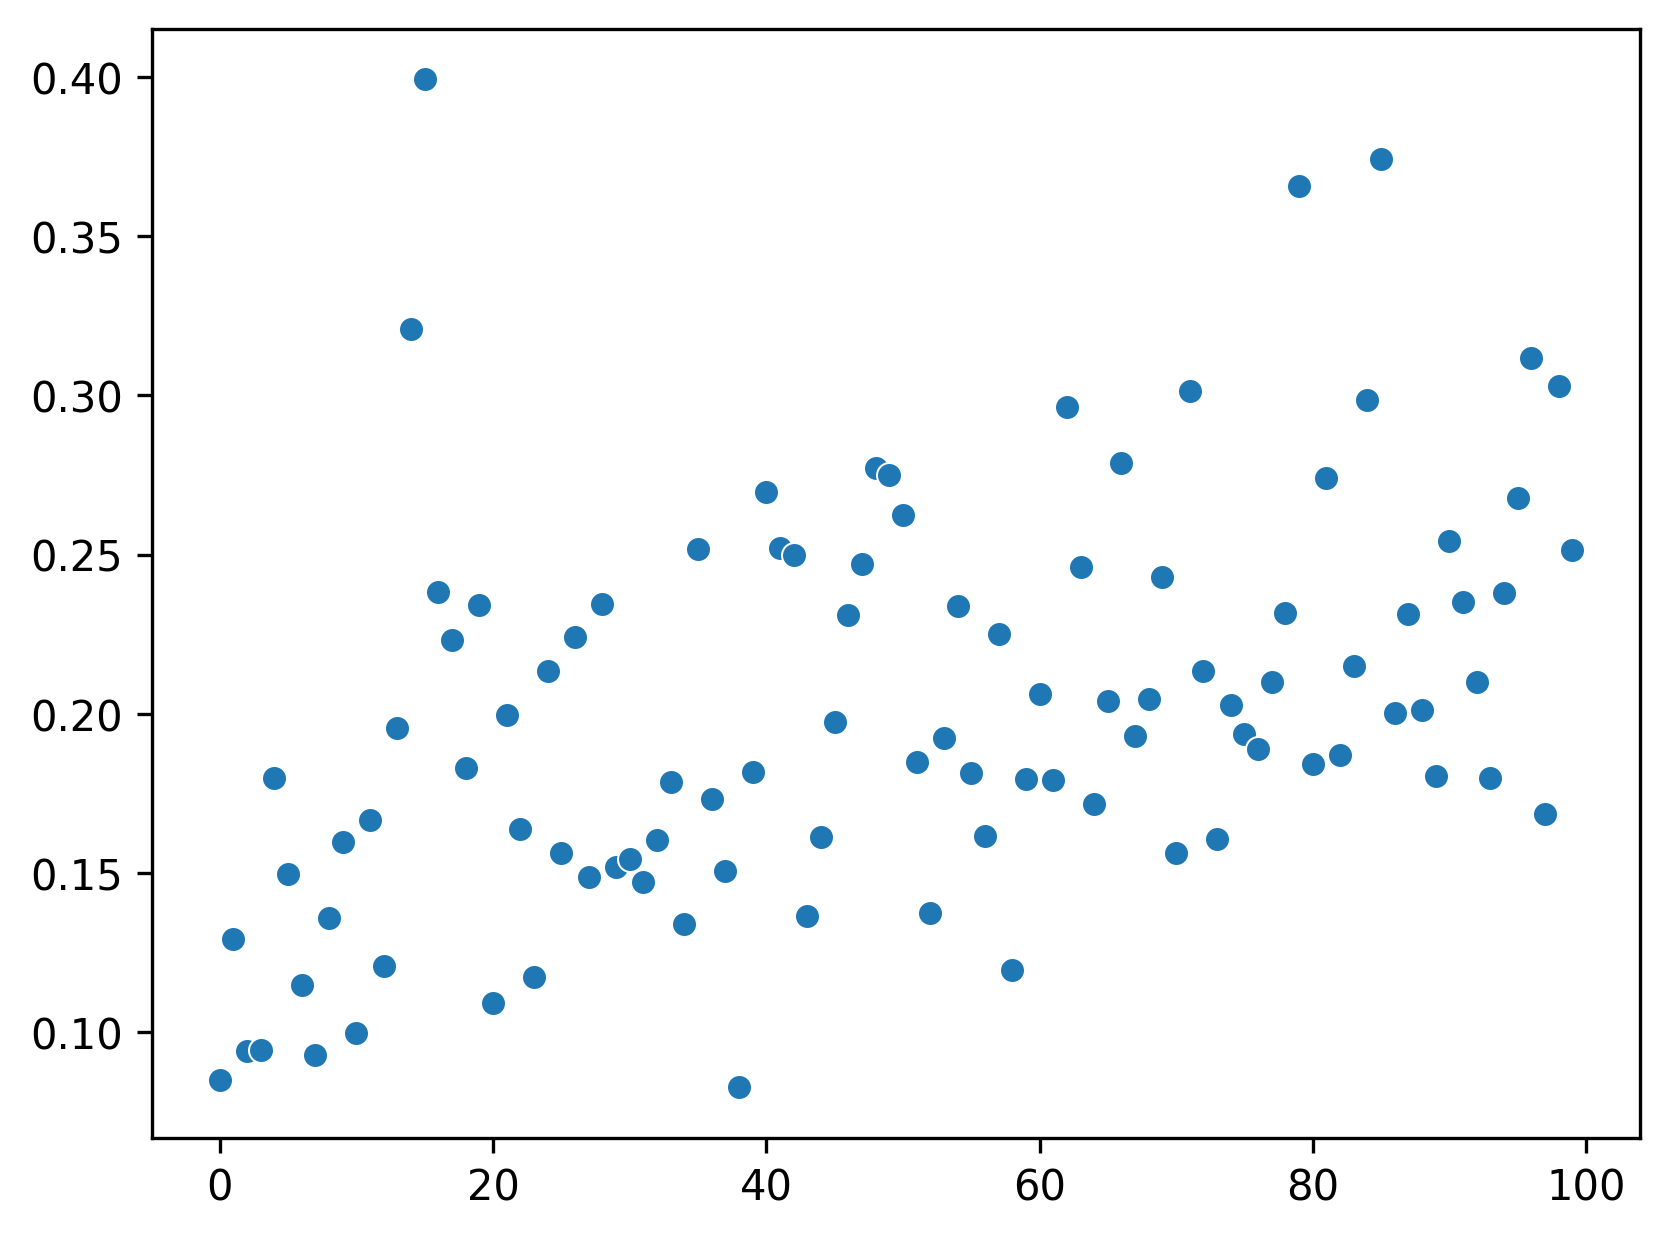

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# do the same to trump
results = np.array(
    [
        np.dot(
            np.dot(eigenvectors_trump[:, i].T, cov_trump_summary_matrix),
            eigenvectors_trump[:, i],
        )
        for i in range(eigenvectors_trump.shape[1])
    ]
)

plt.figure(dpi=300)
sns.scatterplot(results[:100] / eigenvalues_trump[:100])


In [14]:
import nltk
import torch
import re
from nltk.corpus import words
from sentence_transformers import SentenceTransformer
from tqdm.notebook import tqdm

nltk.download("words")
candidates = words.words()
# nltk.download("words")
# fetch out all unqiue words in the random data
unique_words = set()
pattern = re.compile(r"[^a-zA-Z]")
for sentence in trump["Message"]:
    words = sentence.split()
    for word in words:
        word = pattern.sub("", word)
        unique_words.add(word.lower())


# Replace non-alphabetic characters with an empty string

words = list(unique_words.intersection(candidates))
# words = list(unique_words)
# You might want to filter this

# Load a pre-trained model
# Load SBERT model
model = SentenceTransformer("BAAI/bge-base-en-v1.5", device="cuda")

word_precomputed_embeddings = model.encode(words, show_progress_bar=True)
word_embeddings = {
    words[i]: torch.tensor(word_precomputed_embeddings[i]) for i in range(len(words))
}


def find_closest_word(target_embedding, word_dict):
    best_similarity = float("-inf")
    closest_word = None
    target_embedding = torch.tensor(target_embedding)
    for word, embedding in word_dict.items():
        embedding = torch.tensor(embedding)
        similarity = torch.cosine_similarity(target_embedding, embedding, dim=0).item()
        if similarity > best_similarity:
            best_similarity = similarity
            closest_word = word
    return closest_word


def compute_sentence_embedding(sentence, model):
    return model.encode(sentence)


def find_closest_word(target_embedding, word_dict):
    best_similarity = -float("inf")
    closest_word = None
    for word, embedding in word_dict.items():
        similarity = torch.cosine_similarity(target_embedding, embedding, dim=0).item()
        if similarity > best_similarity:
            best_similarity = similarity
            closest_word = word
    return closest_word


def reconstruct_sentence(target_embedding, word_dict, model, max_length=10):
    # Initialize with the closest word to the target embedding
    current_sentence = [find_closest_word(target_embedding, word_dict)]
    current_embedding = compute_sentence_embedding([" ".join(current_sentence)], model)

    while len(current_sentence) < max_length:
        best_sentence = None
        best_similarity = -float("inf")

        # Generate all possible new sentences by adding one word in all possible positions
        new_sentences = []
        for word in word_dict.keys():
            for i in range(len(current_sentence) + 1):
                new_sentence = current_sentence[:i] + [word] + current_sentence[i:]
                new_sentences.append(" ".join(new_sentence))

        # Compute embeddings for all new sentences in one go
        new_embeddings = model.encode(
            new_sentences, convert_to_tensor=True, batch_size=128
        )

        # Calculate similarities and find the best sentence
        similarities = torch.cosine_similarity(
            target_embedding.unsqueeze(0).to("cuda"), new_embeddings.to("cuda"), dim=1
        )
        best_idx = torch.argmax(similarities).item()

        best_sentence = new_sentences[best_idx].split()
        current_sentence = best_sentence
        current_embedding = new_embeddings[best_idx]
        print(
            " ".join(current_sentence)
            + ", Similarity: "
            + str(similarities[best_idx].cpu().numpy())
        )

    return " ".join(current_sentence)

[nltk_data] Downloading package words to /home/maolee/nltk_data...
[nltk_data]   Package words is already up-to-date!


Batches:   0%|          | 0/316 [00:00<?, ?it/s]

In [16]:
eigenvectors_trump_summary[:, 0].astype(float)

/tmp/ipykernel_629527/4042558291.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvectors_trump_summary[:,0].astype(float)


array([ 1.43483381e-01,  4.10537108e-02,  5.10572433e-02,  2.28432325e-02,
       -1.86912412e-02,  7.94963507e-02,  3.80899088e-02,  1.56960727e-02,
        5.32179016e-02,  3.41305099e-02,  2.77312620e-02, -5.04921296e-02,
       -3.15553667e-02, -1.17652034e-02, -3.31758431e-02,  2.74965843e-02,
       -8.23862450e-03, -9.04985378e-03,  3.74123236e-02,  3.64526096e-02,
       -9.45895850e-03,  5.14694999e-02,  1.54676651e-02, -7.25465975e-02,
       -6.23443749e-03,  1.33817569e-02,  4.00980331e-03,  3.48491842e-02,
        2.30135250e-02, -2.91870210e-02, -6.29887075e-03,  3.98592330e-02,
       -1.24853232e-02,  3.21993778e-03, -1.58823448e-02,  2.81898600e-02,
        2.80107274e-02,  4.50293362e-02, -8.25676567e-03, -3.16514817e-02,
       -2.86573711e-02,  2.61111831e-02, -1.94920067e-02, -3.76695978e-02,
        4.11224915e-02,  1.81488587e-02,  1.80169003e-02,  2.23866819e-02,
       -3.28941397e-03, -6.79112298e-03,  8.18339632e-03,  4.35133827e-02,
        6.92810374e-02,  

In [7]:
target_embedding = torch.tensor(eigenvectors_trump[:, 0])
reconstructed_sentence = reconstruct_sentence(target_embedding, word_embeddings, model)
print("Reconstructed Sentence: ", reconstructed_sentence)

discussion profiting, Similarity: 0.4161770093908356
discussion here profiting, Similarity: 0.4559163574394025
discussion here genuinely profiting, Similarity: 0.4734785244675248
discussion here genuinely profiting elect, Similarity: 0.4945077445934937
discussion here genuinely profiting elect greatness, Similarity: 0.5159406229977197
discussion here genuinely mid profiting elect greatness, Similarity: 0.5330721811293418
forum discussion here genuinely mid profiting elect greatness, Similarity: 0.548165891025083
forum for discussion here genuinely mid profiting elect greatness, Similarity: 0.5552795739796638
forum for discussion here genuinely mid casualty profiting elect greatness, Similarity: 0.5671470456864552
Reconstructed Sentence:  forum for discussion here genuinely mid casualty profiting elect greatness


In [5]:
target_embedding = torch.tensor(eigenvectors_trump[:, 1])
reconstructed_sentence = reconstruct_sentence(target_embedding, word_embeddings, model)
print("Reconstructed Sentence: ", reconstructed_sentence)

advertising sank, Similarity: 0.21951692260854647
advertising falsification sank, Similarity: 0.2834584208691887
social advertising falsification sank, Similarity: 0.331637971056854
social advertising ad falsification sank, Similarity: 0.3576275021196651
irritant social advertising ad falsification sank, Similarity: 0.38522703858972784
irritant social advertising ad falsification sank surfaced, Similarity: 0.4035401976696048
irritant social advertising station ad falsification sank surfaced, Similarity: 0.41449575529678007
irritant social savvy advertising station ad falsification sank surfaced, Similarity: 0.4299174834427136
irritant social savvy advertising station sparks ad falsification sank surfaced, Similarity: 0.440577803767104
Reconstructed Sentence:  irritant social savvy advertising station sparks ad falsification sank surfaced


In [6]:
target_embedding = torch.tensor(eigenvectors_trump[:, 2])
reconstructed_sentence = reconstruct_sentence(target_embedding, word_embeddings, model)
print("Reconstructed Sentence: ", reconstructed_sentence)

cartel unfollowed, Similarity: 0.25282607824077735
viral cartel unfollowed, Similarity: 0.312033785789698
viral ad cartel unfollowed, Similarity: 0.34412447755582837
jurist viral ad cartel unfollowed, Similarity: 0.38111191378604575
jurist bowls viral ad cartel unfollowed, Similarity: 0.4044909219521143
jurist plant bowls viral ad cartel unfollowed, Similarity: 0.421480512801019
jurist liberate plant bowls viral ad cartel unfollowed, Similarity: 0.43792147977918117
world jurist liberate plant bowls viral ad cartel unfollowed, Similarity: 0.45413059992458116
world jurist liberate plant bowls viral ad cartel barred unfollowed, Similarity: 0.46573151970758647
Reconstructed Sentence:  world jurist liberate plant bowls viral ad cartel barred unfollowed


## Illegal

In [18]:
illegal = pd.read_csv("../data/illegal.csv")
# encode the raw text
illegal_embedding = model.encode(illegal.Message.tolist(), show_progress_bar=True)
# read the summary data
import re

illegal_summary = pd.read_csv("../data/illegal_sample_summaries.csv")
# clean the summary data

pattern_paragraph = re.compile(r"\s*\([^)]*\)")
illegal_summary["summary"] = illegal_summary["summary"].apply(
    lambda x: pattern_paragraph.sub("", x)
)
# encode the summary
illegal_summary_embedding = model.encode(
    illegal_summary.summary.tolist(), show_progress_bar=True
)

# calculate the covariance matrix
cov_illegal_matrix = np.cov(illegal_embedding.T)
cov_illegal_summary_matrix = np.cov(illegal_summary_embedding.T)

# eigen decomposition
eigenvalues_illegal, eigenvectors_illegal = np.linalg.eig(cov_illegal_matrix)
eigenvalues_illegal_summary, eigenvectors_illegal_summary = np.linalg.eig(
    cov_illegal_summary_matrix
)

# sort the eigenvalues
idx_illegal = eigenvalues_illegal.argsort()[::-1]
eigenvalues_illegal = eigenvalues_illegal[idx_illegal]
eigenvectors_illegal = eigenvectors_illegal[:, idx_illegal]

idx_illegal_summary = eigenvalues_illegal_summary.argsort()[::-1]
eigenvalues_illegal_summary = eigenvalues_illegal_summary[idx_illegal_summary]
eigenvectors_illegal_summary = eigenvectors_illegal_summary[:, idx_illegal_summary]


Batches:   0%|          | 0/539 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

<AxesSubplot: >

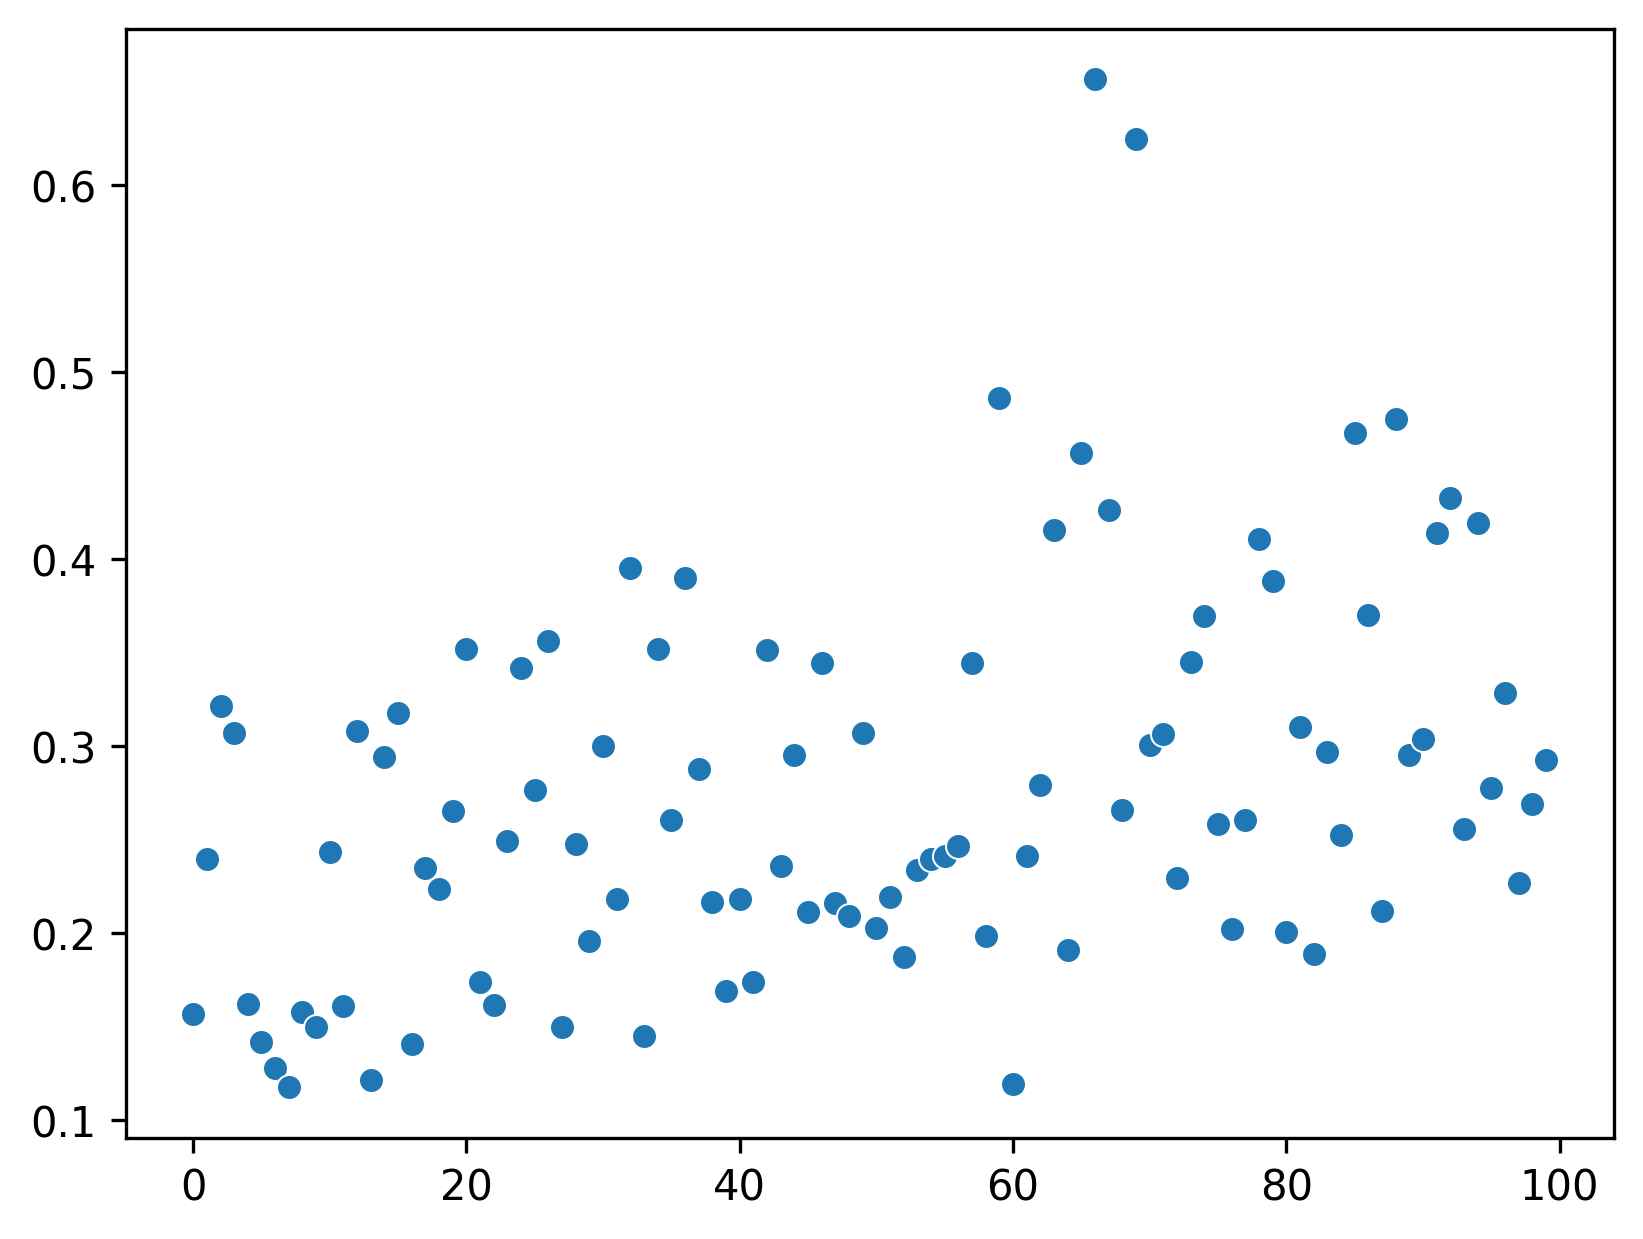

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# do the same to illegal
results = np.array(
    [
        np.dot(
            np.dot(eigenvectors_illegal[:, i].T, cov_illegal_summary_matrix),
            eigenvectors_illegal[:, i],
        )
        for i in range(eigenvectors_illegal.shape[1])
    ]
)

plt.figure(dpi=300)
sns.scatterplot(results[:100] / eigenvalues_illegal[:100])


In [22]:
import nltk
import torch
import re
from nltk.corpus import words
from sentence_transformers import SentenceTransformer
from tqdm.notebook import tqdm

nltk.download("words")
candidates = words.words()
# nltk.download("words")
# fetch out all unqiue words in the random data
unique_words = set()
pattern = re.compile(r"[^a-zA-Z]")
for sentence in illegal["Message"]:
    words = sentence.split()
    for word in words:
        word = pattern.sub("", word)
        unique_words.add(word.lower())


# Replace non-alphabetic characters with an empty string

words = list(unique_words.intersection(candidates))
# words = list(unique_words)

word_precomputed_embeddings = model.encode(words, show_progress_bar=True)
word_embeddings = {
    words[i]: torch.tensor(word_precomputed_embeddings[i]) for i in range(len(words))
}

# candidates_precomputed_embeddings = model.encode(candidates, show_progress_bar=True)
# candidates_embeddings = {
#     candidates[i]: torch.tensor(candidates_precomputed_embeddings[i]) for i in range(len(candidates))
# }


[nltk_data] Downloading package words to /home/maolee/nltk_data...
[nltk_data]   Package words is already up-to-date!


Batches:   0%|          | 0/233 [00:00<?, ?it/s]

Batches:   0%|          | 0/7398 [00:00<?, ?it/s]

In [24]:
target_embedding = torch.tensor(eigenvectors_illegal[:, 0])
reconstructed_sentence = reconstruct_sentence(target_embedding, word_embeddings, model)
print("Reconstructed Sentence: ", reconstructed_sentence)

discussion electorate, Similarity: 0.46957199701210445
discussion re electorate, Similarity: 0.5012336538089107
discussion re electorate thing, Similarity: 0.526610934157143
discussion re electorate democrat thing, Similarity: 0.539246244064933
discussion re electorate democrat thing wondering, Similarity: 0.5517732014319342
discussion re electorate democrat thing wondering b, Similarity: 0.5640850948813951
discussion re electorate democrat thing various wondering b, Similarity: 0.5750149772510433
discussion re electorate biti democrat thing various wondering b, Similarity: 0.5827301375184141
discussion re electorate biti democrat thing various wondering b previous, Similarity: 0.5903182109898921
Reconstructed Sentence:  discussion re electorate biti democrat thing various wondering b previous


In [25]:
target_embedding = torch.tensor(eigenvectors_illegal[:, 1])
reconstructed_sentence = reconstruct_sentence(target_embedding, word_embeddings, model)
print("Reconstructed Sentence: ", reconstructed_sentence)

rove crushing, Similarity: 0.3429270056630366
democrat rove crushing, Similarity: 0.4088734250975064
democrat rove crushing collusion, Similarity: 0.44404450775459836
democrat rove crushing collusion delta, Similarity: 0.47181464488538033
democrat trump rove crushing collusion delta, Similarity: 0.4929172945666594
democrat hopeful trump rove crushing collusion delta, Similarity: 0.5140308614436924
democrat hopeful oversee trump rove crushing collusion delta, Similarity: 0.5337875274866992
democrat hopeful oversee trump rove crushing collusion mad delta, Similarity: 0.5502594255409257
democrat hopeful oversee trump rove crushing collusion mad cellular delta, Similarity: 0.5637964032770891
Reconstructed Sentence:  democrat hopeful oversee trump rove crushing collusion mad cellular delta


## COVID

Batches:   0%|          | 0/558 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

<AxesSubplot: >

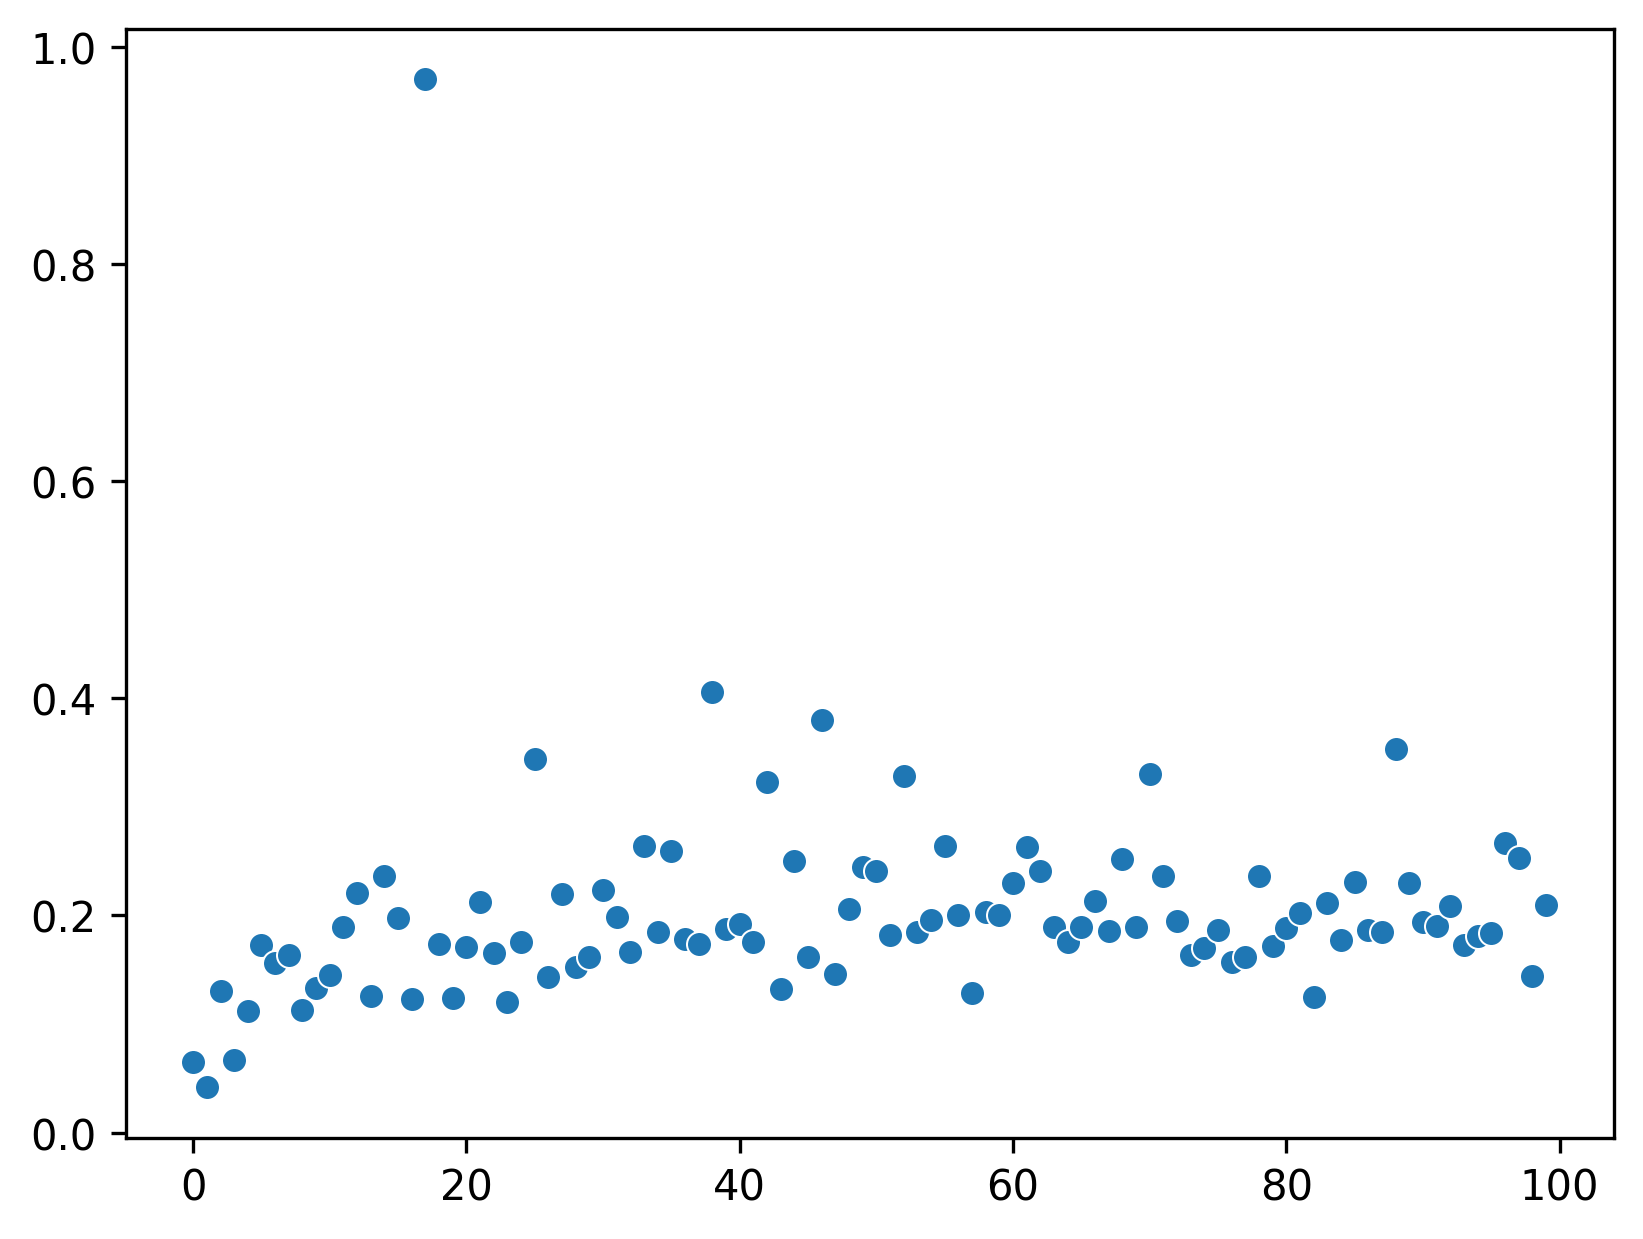

In [26]:
covid = pd.read_csv("../data/covid.csv")
# encode the raw text
covid_embedding = model.encode(covid.Message.tolist(), show_progress_bar=True)
# read the summary data
import re

covid_summary = pd.read_csv("../data/covid_sample_summaries.csv")
# clean the summary data

pattern_paragraph = re.compile(r"\s*\([^)]*\)")
covid_summary["summary"] = covid_summary["summary"].apply(
    lambda x: pattern_paragraph.sub("", x)
)
# encode the summary
covid_summary_embedding = model.encode(
    covid_summary.summary.tolist(), show_progress_bar=True
)

# calculate the covariance matrix
cov_covid_matrix = np.cov(covid_embedding.T)
cov_covid_summary_matrix = np.cov(covid_summary_embedding.T)

# eigen decomposition
eigenvalues_covid, eigenvectors_covid = np.linalg.eig(cov_covid_matrix)
eigenvalues_covid_summary, eigenvectors_covid_summary = np.linalg.eig(
    cov_covid_summary_matrix
)

# sort the eigenvalues
idx_covid = eigenvalues_covid.argsort()[::-1]
eigenvalues_covid = eigenvalues_covid[idx_covid]
eigenvectors_covid = eigenvectors_covid[:, idx_covid]

idx_covid_summary = eigenvalues_covid_summary.argsort()[::-1]
eigenvalues_covid_summary = eigenvalues_covid_summary[idx_covid_summary]
eigenvectors_covid_summary = eigenvectors_covid_summary[:, idx_covid_summary]
import matplotlib.pyplot as plt
import seaborn as sns

# do the same to covid
results = np.array(
    [
        np.dot(
            np.dot(eigenvectors_covid[:, i].T, cov_covid_summary_matrix),
            eigenvectors_covid[:, i],
        )
        for i in range(eigenvectors_covid.shape[1])
    ]
)

plt.figure(dpi=300)
sns.scatterplot(results[:100] / eigenvalues_covid[:100])


In [27]:
import nltk
import torch
import re
from nltk.corpus import words
from tqdm.notebook import tqdm

nltk.download("words")
candidates = words.words()
# nltk.download("words")
# fetch out all unqiue words in the random data
unique_words = set()
pattern = re.compile(r"[^a-zA-Z]")
for sentence in covid["Message"]:
    words = sentence.split()
    for word in words:
        word = pattern.sub("", word)
        unique_words.add(word.lower())


# Replace non-alphabetic characters with an empty string

words = list(unique_words.intersection(candidates))
# words = list(unique_words)

word_precomputed_embeddings = model.encode(words, show_progress_bar=True)
word_embeddings = {
    words[i]: torch.tensor(word_precomputed_embeddings[i]) for i in range(len(words))
}

# candidates_precomputed_embeddings = model.encode(candidates, show_progress_bar=True)
# candidates_embeddings = {
#     candidates[i]: torch.tensor(candidates_precomputed_embeddings[i]) for i in range(len(candidates))
# }

[nltk_data] Downloading package words to /home/maolee/nltk_data...
[nltk_data]   Package words is already up-to-date!


Batches:   0%|          | 0/272 [00:00<?, ?it/s]

In [28]:
target_embedding = torch.tensor(eigenvectors_covid[:, 0])
reconstructed_sentence = reconstruct_sentence(target_embedding, word_embeddings, model)
print("Reconstructed Sentence: ", reconstructed_sentence)

damn unbelievable, Similarity: 0.37390783575349806
whew damn unbelievable, Similarity: 0.3917463012361111
whew damn kirk unbelievable, Similarity: 0.4097959155341553
forum whew damn kirk unbelievable, Similarity: 0.44927244691378865
slightly forum whew damn kirk unbelievable, Similarity: 0.46999246884506546
sweet slightly forum whew damn kirk unbelievable, Similarity: 0.47781115281799025
sweet slightly news forum whew damn kirk unbelievable, Similarity: 0.48809797432012
sweet slightly news forum fan whew damn kirk unbelievable, Similarity: 0.5002824512591686
sweet slightly news forum fan whew damn negligent kirk unbelievable, Similarity: 0.5118057416897259
Reconstructed Sentence:  sweet slightly news forum fan whew damn negligent kirk unbelievable


In [29]:
target_embedding = torch.tensor(eigenvectors_covid[:, 1])
reconstructed_sentence = reconstruct_sentence(target_embedding, word_embeddings, model)
print("Reconstructed Sentence: ", reconstructed_sentence)

census implausible, Similarity: 0.42288377547379075
census just implausible, Similarity: 0.4767523893066278
abolish census just implausible, Similarity: 0.5102919969957512
abolish census just implausible partly, Similarity: 0.5342410730043033
abolish census just woe implausible partly, Similarity: 0.5472916561951913
abolish census just woe implausible partly because, Similarity: 0.5559243276088713
abolish census seem just woe implausible partly because, Similarity: 0.5648747709601581
abolish census seem just woe implausible partly because demographic, Similarity: 0.5746673583340509
abolish census anyway seem just woe implausible partly because demographic, Similarity: 0.5856377420143187
Reconstructed Sentence:  abolish census anyway seem just woe implausible partly because demographic


In [30]:
random = pd.read_csv("../data/random.csv")

In [6]:
def fastLexRank(embeddings: list[float]):
    # sum in column
    z = embeddings.sum(axis=0)
    # normalize the sum
    z = z / np.sqrt((z**2).sum(axis=0))
    ap = np.dot(embeddings, z)
    # normalize the scores by its sum
    return ap


#random_embedding = model.encode(random["Message"])

In [35]:
ap = fastLexRank(random_embedding)

In [37]:
random["Typicality"] = ap

In [39]:
random["Typicality"].sort()

AttributeError: 'Series' object has no attribute 'sort'

In [40]:
random.to_csv("../data/typicality_example.csv", index=False)

In [4]:
trump_embedding = model.encode(trump["Message"])

In [7]:
ap_trump = fastLexRank(trump_embedding)

In [8]:
trump['ap'] = ap_trump

In [49]:
trump.sort_values(by='ap')[-5:]['Message'][13223]

'Trump says hes signing an order that will exclude people who are in the US from being counted by the Census for political representation. Wants to redraw dustrict borders. Keep an eye/ ear out for NPRs to give you the deets. SMH.'

In [10]:
trump.sort_values(by='ap')[-5:]['Message'][24589]

"You must get Trump's Attention immediately on the Census, about to be completed Sep !! This is a Major Trump Campaign Plus, as the Dems blocked the Citizenship Question from the on going Census Count! The Census Count is now totally Invalid as it mingles All"

In [11]:
trump.sort_values(by='ap')[-5:]['Message']

13223    Trump says hes signing an order that will excl...
24589    You must get Trump's Attention immediately on ...
16734    Trump Signs Order Excluding Illegal Immigrants...
13263    Trump isnt done trying to meddle with the Cens...
22020    The Trump admin is politicizing the census. Th...
Name: Message, dtype: object

In [12]:
trump.sort_values(by='ap')[-5:]['Message'][16734]

'Trump Signs Order Excluding Illegal Immigrants from Census to Prevent Inflated Congressional Districts --TRUMP TRIED TO GET THIS ON THE CENSUS... NOWHW HAS TO EO IT.'

In [17]:
'trump' in words

True